In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
features = dataset.drop('target',axis = 1)
target = dataset['target']

In [4]:
from sklearn.cluster import KMeans

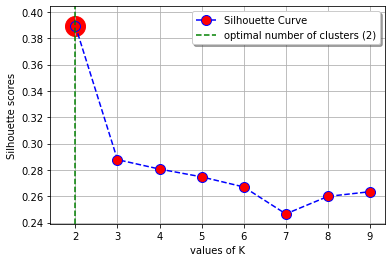

In [22]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state = 42).fit(features) for k in range(1,10)]
silhouette_score = [silhouette_score(features,model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2,10),silhouette_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label = "Silhouette Curve")
k = np.argmax(silhouette_score) + 2
plt.axvline(x = k, linestyle = '--', c='green', label = "optimal number of clusters ({})".format(k))
plt.scatter(k,silhouette_score[k-2],c = 'red',s=400)
plt.legend(shadow = True)
plt.ylabel("Silhouette scores")
plt.xlabel("values of K")
plt.grid()

In [5]:
clustering = KMeans(n_clusters = 2, init = 'k-means++',random_state=42)
clustering.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [6]:
cluster_centers = list(clustering.cluster_centers_)

In [7]:
distances = []
for i in range(0,303):
    center = list(cluster_centers[clustering.labels_[i]])
    objects = list(features.iloc[i])
    distances.append(distance.euclidean(center,objects))

In [8]:
zero = []
one = []
for i in range(0,303):
    if clustering.labels_[i] == 0:
        zero.append(distances[i])
    else:
        one.append(distances[i])

In [9]:
zero = np.array(zero)
one = np.array(one)

In [10]:
zero_mean = zero.mean()
one_mean = one.mean()

In [11]:
outlier_score = []
outlier_score_zero = []
outlier_score_one = []

for i in range(0,303):
    if clustering.labels_[i] == 0:
        outlier_score.append(distances[i]/zero_mean)
        outlier_score_zero.append(distances[i]/zero_mean)
    elif clustering.labels_[i] == 1:
         outlier_score.append(distances[i]/one_mean)
         outlier_score_one.append(distances[i]/one_mean)

In [12]:
score_zero = np.array(outlier_score_zero)
score_one = np.array(outlier_score_one)

In [13]:
def boxplot(dist_list):
    sort_score_zero = sorted(dist_list)
    med1 = np.argwhere(sort_score_zero == np.percentile(sort_score_zero,50,interpolation='nearest'))
    med1 = med1[0][0]
    #print(med1)
    firsthalf = sort_score_zero[0:med1+1]
    lasthalf = sort_score_zero[med1+1:]
    firsthalf = np.array(firsthalf)
    lasthalf = np.array(lasthalf)
    q1_index = np.argwhere(firsthalf == np.percentile(firsthalf,50,interpolation='nearest'))
    #print(q1_index)
    q1_index = q1_index[0][0]
    q3_index = np.argwhere(lasthalf == np.percentile(lasthalf,50,interpolation='nearest'))
    q3_index = q3_index[0][0]
    q1 = firsthalf[q1_index]
    q3 = lasthalf[q3_index]
    #print(q1_index)
    #print(q3_index)
    IQR = q3 - q1
    MaxT = q3 + 1.5 * IQR
    MinT = q1 - 1.5 * IQR
    return ((MaxT,MinT))

In [14]:
MaxT1,MinT1 = boxplot(score_zero)
MaxT2,MinT2 = boxplot(score_one)

In [15]:
outlier_label = []
for i in range(0,303):
    if clustering.labels_[i] == 0:
        if outlier_score[i] > MaxT1 or outlier_score[i] < MinT1:
            outlier_label.append(0)
        else:
            outlier_label.append(1)
            
    elif clustering.labels_[i] == 1:
         if outlier_score[i] > MaxT2 or outlier_score[i] < MinT2:
            outlier_label.append(0)
         else:
            outlier_label.append(2)

In [16]:
print(outlier_label.count(0))

12


In [17]:
for i in range(0,303):
    if outlier_label[i] == 0:
        dataset.drop(i,axis=0,inplace =True)

In [18]:
new = dataset.to_csv(r'C:\Users\muktadir\Desktop\Anomaly Detection\anomaly detection\ronyripan\anomaly detection\k2.csv',encoding='utf-8',index=False)

In [19]:
new_dataset = pd.read_csv('k2.csv')
old_dataset = pd.read_csv('heart.csv')

Text(0.5, 0, 'without anomaly')

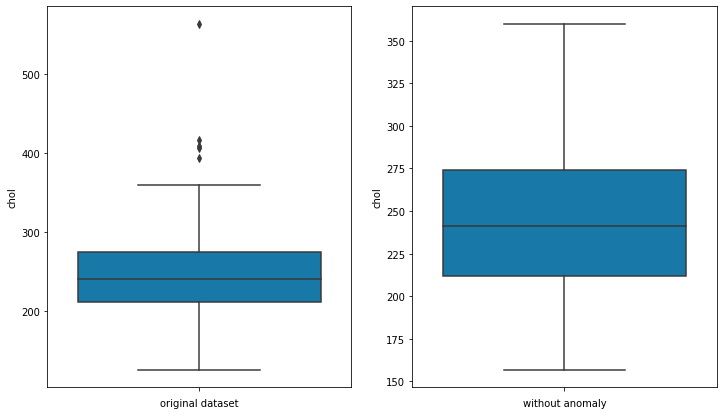

In [20]:
fig = plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.boxplot(y='chol',data=old_dataset,palette = 'winter')
plt.xlabel('original dataset')
plt.subplot(1,2,2)
sns.boxplot(y='chol',data=new_dataset,palette = 'winter')
plt.xlabel('without anomaly')

Text(0, 0.5, 'age')

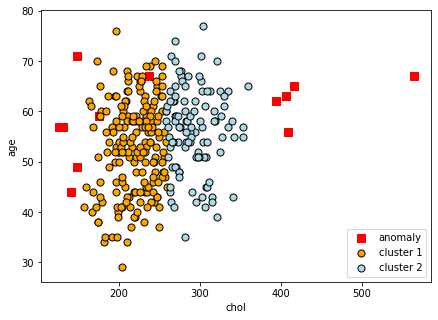

In [21]:
outlier_label = np.array(outlier_label)
#print(outlier_label)
outlier_label = outlier_label.reshape(1,303)
plt.figure(figsize=(7,5))
plt.scatter(features[outlier_label[0] == 0].chol,
            features[outlier_label[0] == 0].age,
            s=50,
            c='red',
            marker='s',
           label = 'anomaly')
plt.scatter(features[outlier_label[0] == 1].chol,
            features[outlier_label[0] == 1].age,
            s=50,
            c='orange',
            marker='o',
            edgecolors= 'black',
            label='cluster 1')
plt.scatter(features[outlier_label[0] == 2].chol,
            features[outlier_label[0] == 2].age,
            s=50,
            c='lightblue',
            marker='o',
            edgecolors= 'black',
            label='cluster 2')

plt.legend(loc = 'lower right')
plt.xlabel('chol')
plt.ylabel('age')
#plt.savefig('K=2.png')